# Layer of Neurons and Batch of Data Using Numpy
From lecture 1, 1 layer of 3 neurons

In [1]:
import numpy as np

inputs = [ # Batch of inputs
    [1.0, 2.0, 3.0, 2.5], 
    [2.0, 5.0, -1.0, 2.0], 
    [-1.5, 2.7, 3.3, -0.8]
]
weights = np.array([
    [0.2, 0.8, -0.5, 1],
    [0.5, -0.91, 0.26, -0.5],
    [-0.26, -0.27, 0.17, 0.87]
])
biases = [2.0, 3.0, 0.5]

outputs = np.dot(inputs, weights.T) + biases
# For every row of inputs, compute the dot of input set and weights
print(outputs)

[[ 4.8    1.21   2.385]
 [ 8.9   -1.81   0.2  ]
 [ 1.41   1.051  0.026]]


# 2 Layers and Batch of Data Using Numpy
2 layers. Layer 1 and layer 2 have 3 neurons. Therefore, there are 3 final outputs.

There are 3 batches of input data to generate 3 total output arrays.

In [4]:
import numpy as np

inputs = [[1, 2, 3, 2.5],
          [2., 5., -1., 2],
          [-1.5, 2.7, 3.3, -0.8]]

weights = [[0.2, 0.8, -0.5, 1],
           [0.5, -0.91, 0.26, -0.5],
           [-0.26, -0.27, 0.17, 0.87]]

biases = [2, 3, 0.5]

weights2 = [[0.1, -0.14, 0.5],
            [-0.5, 0.12, -0.33],
            [-0.44, 0.73, -0.13]]

biases2 = [-1, 2, -0.5]

# Make the lists np.arrays so we can transpose them
inputs_array = np.array(inputs)
weights_array = np.array(weights)
biases_array = np.array(biases)
weights2_array = np.array(weights2)
biases2_array = np.array(biases2)

# Get the output of the first layer
layer1_outputs = np.dot(inputs_array, weights_array.T) + biases_array

# Feed the output of the first layer into the second layer with their own weights
layer2_outputs = np.dot(layer1_outputs, weights2_array.T) + biases2_array

print(layer2_outputs)

[[ 0.5031  -1.04185 -2.03875]
 [ 0.2434  -2.7332  -5.7633 ]
 [-0.99314  1.41254 -0.35655]]


# 4 Layers and Batch of Data Using Numpy
Cascading neural network with 4 layers. Layer 1 has 4 neurons, layer 2 has 3, layer 3 has 2 and layer 4 has a single output.

In [7]:
import numpy as np

# Batch of inputs
inputs = [
    [1, 2, 3, 2.5],
    [2., 5., -1., 2],
    [-1.5, 2.7, 3.3, -0.8]
]

# Weights are stored in a list of np.array
# index 0 = layer 1 weights and so on
weights = [
    np.array([  # Layer 1
        [0.2, 0.8, -0.5, 1],            # Neuron 1.1
        [0.5, -0.91, 0.26, -0.5],       # Neuron 1.2
        [-0.26, -0.27, 0.17, 0.87],     # Neuron 1.3
        [-0.27, 0.87, 0.2, 0.8],        # Neuron 1.4
    ]),
    np.array([  # Layer 2
        [0.1, 0.65, -0.24, 1.2],        # Neuron 2.1
        [0.51, -0.21, 0.206, -0.05],    # Neuron 2.2
        [-0.46, -0.67, 0.14, 0.37],     # Neuron 2.3
    ]),
    np.array([  # Layer 3
        [0.25, 0.4, -0.2],              # Neuron 3.1
        [0.58, -0.25, 0.26],            # Neuron 3.2
    ]),
    np.array([  # Layer 4
        [0.3, 0.1],                     # Neuron 4.1
    ])
]
biases = [
    [0.5, 2, 1, -2],                    # Layer 1
    [0.2, -0.6, 1.3,],                  # Layer 2
    [-1, 0.5,],                         # Layer 3
    [0.28],                             # Layer 4
]

# Iterate through each layer, get the output of the layer, use it as the input for the next layer
layer_inputs = inputs
layer_outputs = np.array([])
for layer in range(len(weights)):
    layer_weights = weights[layer]
    layer_biases = biases[layer]
    layer_outputs = np.dot(layer_inputs, layer_weights.T) + layer_biases
    
    # Update the inputs for the next layer based on the outputs of this layer
    layer_inputs = layer_outputs
# layer_outputs is left holding the final outputs of the network

print(layer_outputs)

[[0.47467235]
 [0.7219189 ]
 [0.0541053 ]]


# Generating Non Linear Training Data
Generate 2D training data, x and y

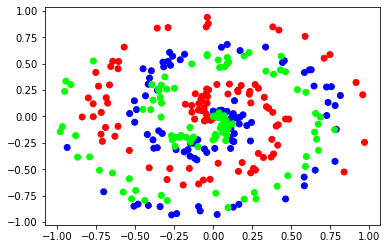

In [2]:
from nnfs.datasets import spiral_data
import numpy as np
import nnfs
nnfs.init()
import matplotlib.pyplot as plt
X, y = spiral_data(samples=100, classes=3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.show()

# Dense Layer Class
Given number of neurons and inputs in the layer, predict the output by assigning weights and biases.

In [4]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data
nnfs.init()

class Layer_Dense:
    def __init__(self, n_inputs, n_neurons):
        # Initialize the weights and biases
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)  # Normal distribution of weights
        self.biases = np.zeros((1, n_neurons))

    def forward(self, inputs):
        # Calculat ethe output values from inputs, weights, and biases
        self.output = np.dot(inputs, self.weights) + self.biases        # Weights are already transposed

# Create a dataset
X, y = spiral_data(samples=100, classes=3)
# Create a dense layer with 2 inputs and 3 output values
dense1 = Layer_Dense(2, 3)
# Perform a forward pass of the dataset through the dense layer
dense1.forward(X)

# Print just the first few outputs
print(dense1.output[:5])


[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-1.0475188e-04  1.1395361e-04 -4.7983500e-05]
 [-2.7414842e-04  3.1729150e-04 -8.6921798e-05]
 [-4.2188365e-04  5.2666257e-04 -5.5912682e-05]
 [-5.7707680e-04  7.1401405e-04 -8.9430439e-05]]


# Activation Function: ReLU
Rectified Linear Unit
